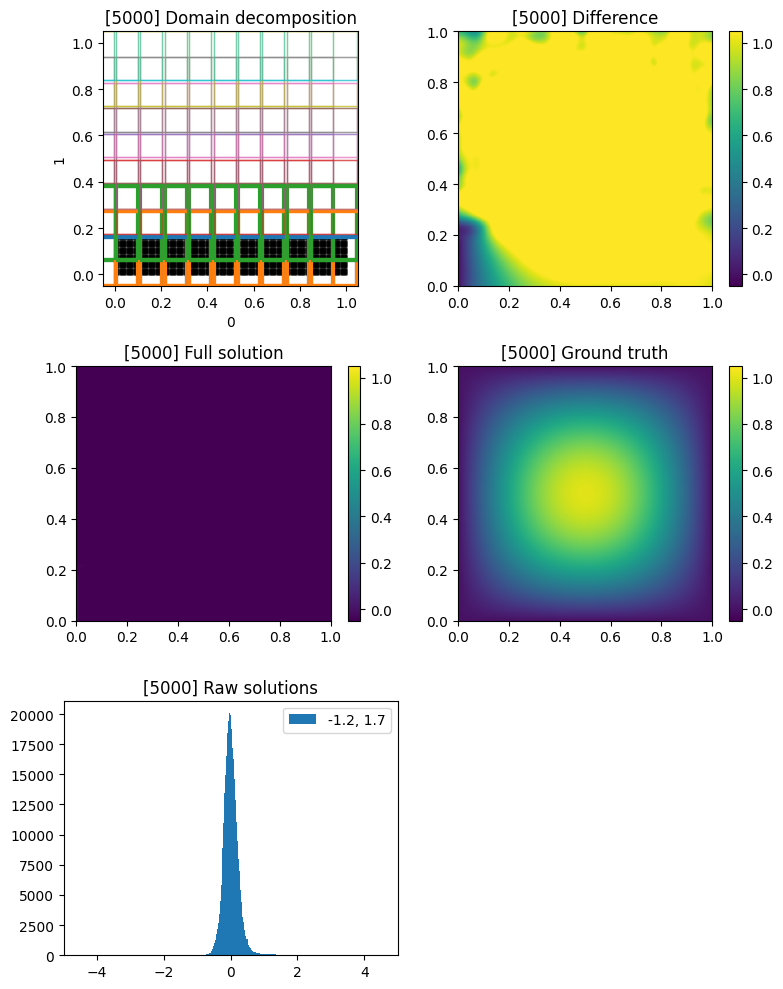

[INFO] 2025-03-10 00:21:53 - [i: 5264/100000] Updating active inputs..
[INFO] 2025-03-10 00:21:54 - [i: 5264/100000] Average number of points/dimension in active subdomains: 39.63
[INFO] 2025-03-10 00:21:55 - [i: 5264/100000] Updating active inputs done (1.80 s)
[INFO] 2025-03-10 00:21:55 - [i: 5264/100000] Compiling update step..
[INFO] 2025-03-10 00:21:55 - x_batch
[INFO] 2025-03-10 00:21:55 - (11000, 2), float32, JVPTracer
[INFO] 2025-03-10 00:21:55 - x_take
[INFO] 2025-03-10 00:21:55 - (85500, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-10 00:21:55 - x_batch
[INFO] 2025-03-10 00:21:55 - (11000, 2), float32, JVPTracer
[INFO] 2025-03-10 00:21:55 - x_take
[INFO] 2025-03-10 00:21:55 - (85500, 2), float32, JVPTracer
input: (2,)
output: (1,)
[INFO] 2025-03-10 00:21:55 - x_batch
[INFO] 2025-03-10 00:21:55 - (27, 2), float32, DynamicJaxprTracer
[INFO] 2025-03-10 00:21:55 - x_take
[INFO] 2025-03-10 00:21:55 - (144, 2), float32, DynamicJaxprTracer
input: (2,)
output: (1,)


KeyboardInterrupt: 

In [1]:
import numpy as np

from fbpinns.domains import RectangularDomainND
from fbpinns.problems import BurgersEquation2D, Poisson2D
from fbpinns.decompositions import RectangularDecompositionND
from fbpinns.networks import ChebyshevKAN
from fbpinns.schedulers import LineSchedulerRectangularND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

subdomain_xs=[np.linspace(-1,1,20), np.linspace(0,1,10)]
c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([0.,0.]),
        xmax=np.array([1.,1.])
        ),
    problem=Poisson2D,
    problem_init_kwargs = dict(),
    decomposition=RectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xs=subdomain_xs,
        subdomain_ws=get_subdomain_ws(subdomain_xs, 2.9),
        unnorm=(-1, 1),
    ),
    network=ChebyshevKAN,
    network_init_kwargs=dict(
        input_dim=2,
        output_dim=1,
        degree=9
    ),
    scheduler = LineSchedulerRectangularND,
    scheduler_kwargs = dict(
        point=[0.], iaxis=0,
    ),
    # First element: interior sampling shape for the physics loss (here 200 x 200 points)
    # Second element: boundary sampling shapes; for 2D, we need 4 tuples (one for each boundary)
    ns=((200, 200), ((100,), (100,), (100,), (100,))),
    # n_test provides the test sampling shape for the interior (here also 200 x 200)
    n_test=(200, 200),
    n_steps=100000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()